# Trade 데이터의 고객 행동 유형 분석

trade와 customer 데이터를 통해서 행동유형을 분석하겠습니다.  
고객 유형은 임의로 연령과 성별로 분류했습니다.  
행동 분석 과정은 다음과 같습니다.  
- 데이터 합치기

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
female = sns.color_palette('Reds',5)
male =  sns.color_palette('Blues',5)
palette = {0:female[0], 5:male[0],
           1:female[1], 6:male[1],
           2:female[2], 7:male[2],
           3:female[3], 8:male[3],
           4:female[4], 9:male[4]}

path = 'DATA/font/NanumGothic-ExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [2]:
cks_dtype = {'clnt_id':'int64',
             'sess_id':'int64',
             'hit_seq':'int64',
             'action_type':'int64',
             'biz_unit':'category',
             'sess_dt':'object',
             'hit_tm':'object',
             'hit_pss_tm':'int64',
             'trans_id':'float64',
             'sech_kwd':'object',
             'tot_pag_view_ct':'float64',
             'tot_sess_hr_v':'float64',
             'trfc_src':'category',
             'dvc_ctg_nm':'category',
             'pd_c':'float64',
             'de_dt':'object',
             'de_tm':'object',
             'buy_am':'int64',
             'buy_ct':'int64',
             'clnt_gender':'category',
             'clnt_age':'float64'}

In [3]:
online = pd.read_csv('./DATA/온라인 행동 정보(CKS).csv', dtype=cks_dtype)
trade = pd.read_csv('./DATA/거래 정보(CKS).csv', dtype=cks_dtype)
customer = pd.read_csv('./DATA/고객 정보(CKS).csv', dtype=cks_dtype)
item = pd.read_csv('./DATA/상품분류 정보(CKS).csv', dtype=cks_dtype)

### 데이터 확인

In [4]:
trade.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,2,42449.0,1,A02,1015.0,20190704,15:34,46430,1
1,2,62037.0,1,A03,92.0,20190729,23:47,36000,20
2,2,64691.0,1,A03,186.0,20190731,21:25,3790,1
3,2,64691.0,2,A03,151.0,20190731,21:25,3990,1
4,2,64691.0,3,A03,351.0,20190731,21:25,4690,1


In [6]:
trade.shape

(599961, 9)

In [7]:
customer.head()

,clnt_id,clnt_gender,clnt_age
0,1,NaN,NaN
1,2,F,30.0
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


In [8]:
customer.shape

(72399, 3)

In [5]:
data = pd.merge(trade, customer, on='clnt_id')

In [6]:
data

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age
0,2,42449.0,1,A02,1015.0,20190704,15:34,46430,1,F,30.0
1,2,62037.0,1,A03,92.0,20190729,23:47,36000,20,F,30.0
2,2,64691.0,1,A03,186.0,20190731,21:25,3790,1,F,30.0
3,2,64691.0,2,A03,151.0,20190731,21:25,3990,1,F,30.0
4,2,64691.0,3,A03,351.0,20190731,21:25,4690,1,F,30.0
...,...,...,...,...,...,...,...,...,...,...,...
599956,72424,136596.0,38,B01,1580.0,20190727,11:22,2500,1,M,40.0
599957,72424,136596.0,39,B01,391.0,20190727,11:22,12980,1,M,40.0
599958,72424,136596.0,40,B01,964.0,20190727,11:22,2980,1,M,40.0
599959,72424,136596.0,41,B01,1571.0,20190727,11:22,1380,1,M,40.0


## 새로운 고객 유형

총 10개의 조합. 10의 카테고리로 재정의합니다.

|여성|구분|남성|구분|
|---|---|---|---|
|20, F|0|20, M|5|
|30, F|1|30, M|6|
|40, F|2|40, M|7|    
|50, F|3|50, M|8|  
|60, F|4|60, M|9|

In [7]:
def newcategorymaker(gender, age):
    if gender=='F':
        if age==20:
            x = 0
        elif age==30:
            x = 1
        elif age==40:
            x = 2
        elif age==50:
            x = 3
        elif age==60:
            x = 4
        else:
            x = np.NaN
    else:
        if age==20:
            x = 5
        elif age==30:
            x = 6
        elif age==40:
            x = 7
        elif age==50:
            x = 8
        elif age==60:
            x = 9
        else:
            x = np.NaN
    return x

In [8]:
data['clnt_type'] = data.apply(lambda x: newcategorymaker(x['clnt_gender'],x['clnt_age']), axis=1)

### 고객 유형 분포도

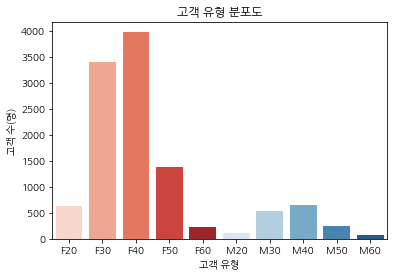

In [9]:
title = '고객 유형 분포도'

fig =  plt.figure()
sns.countplot(data=data[['clnt_id','clnt_type']].drop_duplicates(), x='clnt_type', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('고객 수(명)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.show()

In [14]:
data

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clnt_type
0,2,42449.0,1,A02,1015.0,20190704,15:34,46430,1,F,30.0,1.0
1,2,62037.0,1,A03,92.0,20190729,23:47,36000,20,F,30.0,1.0
2,2,64691.0,1,A03,186.0,20190731,21:25,3790,1,F,30.0,1.0
3,2,64691.0,2,A03,151.0,20190731,21:25,3990,1,F,30.0,1.0
4,2,64691.0,3,A03,351.0,20190731,21:25,4690,1,F,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
599956,72424,136596.0,38,B01,1580.0,20190727,11:22,2500,1,M,40.0,7.0
599957,72424,136596.0,39,B01,391.0,20190727,11:22,12980,1,M,40.0,7.0
599958,72424,136596.0,40,B01,964.0,20190727,11:22,2980,1,M,40.0,7.0
599959,72424,136596.0,41,B01,1571.0,20190727,11:22,1380,1,M,40.0,7.0


### 매장별 이용 현황

clnt_type, biz_unit 활용

In [10]:
data['biz_unit'].unique()

[A02, A03, B01, B02, A01, B03]
Categories (6, object): [A02, A03, B01, B02, A01, B03]

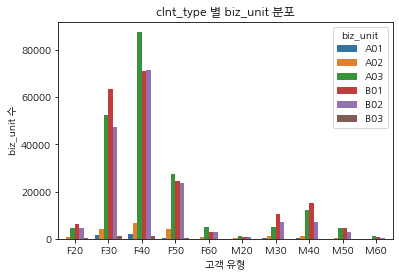

In [11]:
title = 'clnt_type 별 biz_unit 분포'

fig =  plt.figure()

# 횟수의 unique 경우
sns.countplot(data=data[['clnt_type', 'biz_unit']], x='clnt_type', hue='biz_unit')

plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('biz_unit 수')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.show()

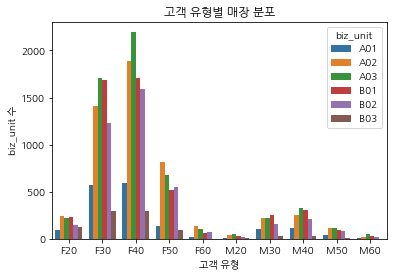

In [12]:
title = '고객 유형별 매장 분포'

fig =  plt.figure()

# 사람 unique 경우
sns.countplot(data=data[['clnt_id','clnt_type', 'biz_unit']].drop_duplicates(), x='clnt_type', hue='biz_unit')

plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('biz_unit 수')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.show()

20대가 A01에서 몇 명 결제하는지 알고 싶은 것 Vs 몇 번 결제하는지 알고 싶은 것

### 날짜별 구매 이력

clnt_type, de_dt 활용

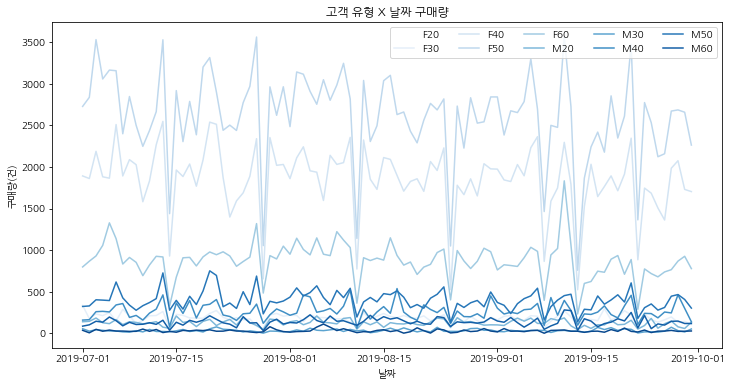

In [13]:
data_dt = data.copy()

title = '고객 유형 X 날짜 구매량'

data_dt['de_dt'] = pd.to_datetime(data_dt['de_dt'], format='%Y%m%d')
part_date = data_dt.groupby(['de_dt','clnt_type']).size().to_frame('count').reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=part_date, x='de_dt', y='count', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('날짜'); plt.ylabel('구매량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=5)

plt.show()

### 요일별 구매

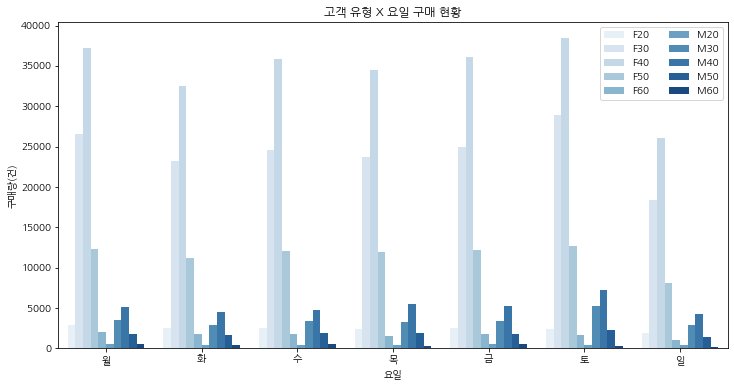

In [14]:
title = '고객 유형 X 요일 구매 현황'

data_dt['weekday'] = data_dt['de_dt'].apply(lambda x: x.weekday())

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=data_dt, x='weekday', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('요일'); plt.ylabel('구매량(건)')

week_label=['월','화','수','목','금','토','일']
plt.xticks(ticks=np.arange(7), labels = week_label)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.show()

전체적으로 일요일에 가장 적게 구매하고, 토요일에 가장 많이 구매하는 것으로 보입니다. 30~40대 여성의 구매량이 두드러집니다.

### 시간대별 구매 현황

시간대별로 categorcal하게 전처리 한다면 의미 도출 및 user 그룹 분류에 용이할 것을 판단됨

- 0: 0~6시=새벽
- 1: 6~12시=오전
- 2: 12~18시=오후
- 3: 18~24=밤

In [16]:
def  NewDeTm(data):
    if data['de_tm'] < '06:00':
        x = 0
    elif data['de_tm'] < '12:00':
        x = 1
    elif data['de_tm'] < '18:00':
        x = 2
    elif data['de_tm'] < '24:00':
        x = 3
    else:
        x = np.NaN
    return x

In [18]:
data_dt['time_ct'] = data_dt.apply(lambda x: NewDeTm(x), axis=1)

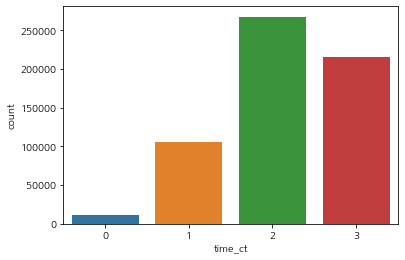

In [19]:
sns.countplot(data_dt['time_ct'])

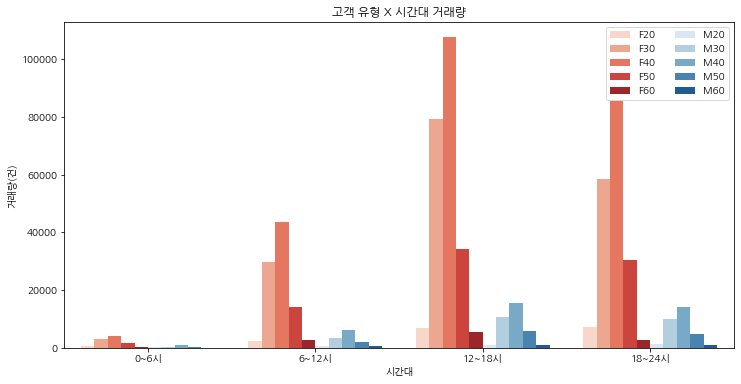

In [26]:
title = '고객 유형 X 시간대 거래량'

# part_hour = data_dt.groupby(['time_ct','clnt_type']).size().to_frame('count').reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=data_dt, x='time_ct', hue='clnt_type', palette=palette)

plt.title(title)
plt.xlabel('시간대'); plt.ylabel('거래량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

time_label=['0~6시','6~12시','12~18시','18~24시']
plt.xticks(ticks=np.arange(4), labels = time_label)


plt.show()

12시~18시 거래량이 많다는 사실을 알 수 있습니다. 새벽(0시-6시)에는 거래량이 매우 적습니다. 

### 고객 유형별 매장 구매 수량 분포

clnt_type, biz_unit, buy_ct 활용

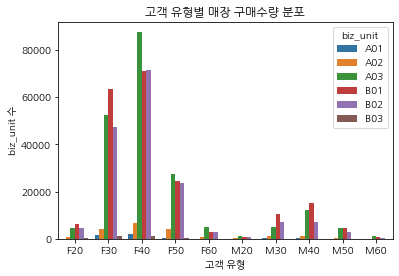

In [27]:
title = '고객 유형별 매장 구매수량 분포'

fig =  plt.figure()

# 횟수의 unique 경우
sns.countplot(data=data[['clnt_type', 'biz_unit', 'buy_ct']], x='clnt_type', hue='biz_unit')

plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('biz_unit 수')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.show()

30대와 40대 여성의 구입량이 매우 많습니다. 남성 연령대에서도 30대와 40대의 구입량이 많은 것으로 보면 가구 단위가 대체로 2인 이상의 가족 형태이기 때문으로 추측됩니다.  

### 매장별 구매 금액

clnt_type, biz_unit, buy_am 활용

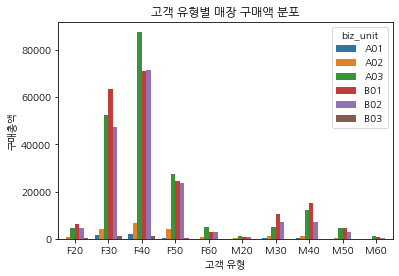

In [30]:
title = '고객 유형별 매장 구매액 분포'

fig =  plt.figure()

# 횟수의 unique 경우
sns.countplot(data=data[['clnt_type', 'biz_unit', 'buy_am']], x='clnt_type', hue='biz_unit')

plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('구매총액')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.show()

### 날짜별 구매 금액
buy_am, de_dt, clnt_type

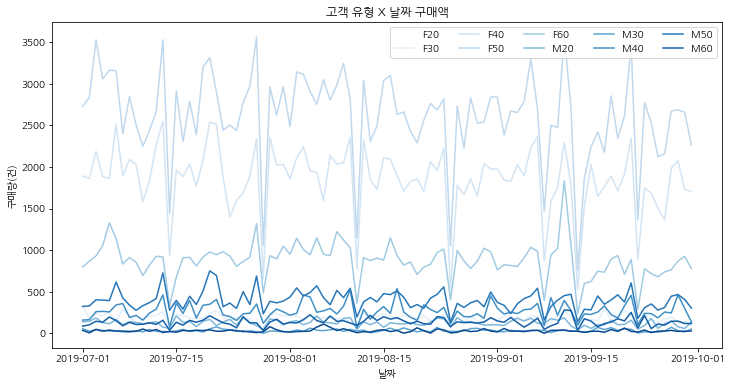

In [31]:
data_dt = data.copy()

title = '고객 유형 X 날짜 구매액'

data_dt['de_dt'] = pd.to_datetime(data_dt['de_dt'], format='%Y%m%d')
part_date = data_dt.groupby(['de_dt','clnt_type']).size().to_frame('count').reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=part_date, x='de_dt', y='count', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('날짜'); plt.ylabel('구매량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=5)

plt.show()

### 날짜별 메징 이용률

In [ ]:
# 어떤걸 말씀하시는거죠??

### 거래 정보 특징